In [4]:
# pwd = "/Users/youtao/code"
pwd = "/scratch/ty296"
hdf5_data_path = '/scratch/ty296/hdf5_data/'
import os
print(os.getcwd())
import sys
sys.path.append('/scratch/ty296/CT_MPS_mini')
import h5py
import numpy as np
import seaborn as sns

/scratch/ty296


In [5]:
from read_hdf5_func import *

In [26]:
from datetime import date
# hdf5_combined_data_path = "/ospool/ap20/data/ty296/hdf5_data_combined"
hdf5_combined_data_path = "/scratch/ty296/hdf5_data_combined"
p_fixed_name = 'p_ctrl'
p_fixed_value = 0.4
combined_sv_filename = os.path.join(hdf5_combined_data_path, f"sv_combined_{p_fixed_name}{p_fixed_value}_{date.today()}.h5")
# combined_sv_filename = "/scratch/ty296/hdf5_data_combined/sv_combined_p_ctrl0.4_2025-10-19.h5"
# combine(combined_sv_filename, p_fixed_name, p_fixed_value, eps_value=[0.0,1e-15])


In [27]:
combined_sv_filename

'/scratch/ty296/hdf5_data_combined/sv_combined_p_ctrl0.4_2025-10-27.h5'

In [28]:
with h5py.File(combined_sv_filename, 'r') as f:
    keys = list(f.keys())
    print(len(keys))
    for key in keys:
        ds = f[key][()]
        L = int(f[key].attrs['L'])
        if L == 24:
            print(ds.shape[0], f[key].attrs['p_proj'], f[key].attrs['seed'])


31987
160 0.55 0
21 0.55 1
187 0.55 10
149 0.55 100
92 0.55 101
665 0.55 102
211 0.55 103
95 0.55 104
426 0.55 105
94 0.55 106
20 0.55 107
124 0.55 108
105 0.55 109
198 0.55 11
512 0.55 110
300 0.55 111
87 0.55 112
102 0.55 113
49 0.55 114
35 0.55 115
40 0.55 116
166 0.55 117
32 0.55 118
202 0.55 119
126 0.55 12
429 0.55 120
230 0.55 121
64 0.55 122
500 0.55 123
53 0.55 124
25 0.55 125
196 0.55 126
665 0.55 127
153 0.55 128
42 0.55 129
3 0.55 13
645 0.55 131
202 0.55 132
126 0.55 133
40 0.55 134
131 0.55 135
985 0.55 136
150 0.55 137
93 0.55 138
741 0.55 139
2 0.55 14
44 0.55 140
483 0.55 141
196 0.55 142
237 0.55 143
30 0.55 144
456 0.55 145
95 0.55 146
141 0.55 147
66 0.55 148
68 0.55 149
142 0.55 15
227 0.55 150
9 0.55 151
138 0.55 152
100 0.55 154
108 0.55 155
36 0.55 156
235 0.55 157
9 0.55 158
56 0.55 159
15 0.55 16
28 0.55 160
88 0.55 161
49 0.55 162
64 0.55 163
201 0.55 164
209 0.55 165
27 0.55 166
88 0.55 167
75 0.55 168
347 0.55 169
23 0.55 17
601 0.55 170
418 0.55 171
120 0.

In [38]:
n = 0
from read_hdf5_func import h5_to_csv
for threshold_val in np.linspace(1e-15, 1e-14, 10):
    h5_to_csv(combined_sv_filename, n, threshold_val, p_fixed_name, p_fixed_value, save_folder="/scratch/ty296/plots")

/scratch/ty296/CT_MPS_mini/read_hdf5_func.py:389: RuntimeWarning: divide by zero encountered in log
  SvN = np.log(len(sv_arr))


INFINITY VALUE (skipping): seed=153
  Parameters: L=8, p_ctrl=0.4, p_proj=0.5
INFINITY VALUE (skipping): seed=173
  Parameters: L=8, p_ctrl=0.4, p_proj=0.5
INFINITY VALUE (skipping): seed=86
  Parameters: L=8, p_ctrl=0.4, p_proj=0.5
threadhold 1e-15 saved to /scratch/ty296/plots/s0_threshold1.0e-15_p_ctrl0.4.csv
INFINITY VALUE (skipping): seed=153
  Parameters: L=8, p_ctrl=0.4, p_proj=0.5
INFINITY VALUE (skipping): seed=173
  Parameters: L=8, p_ctrl=0.4, p_proj=0.5
INFINITY VALUE (skipping): seed=86
  Parameters: L=8, p_ctrl=0.4, p_proj=0.5
threadhold 2e-15 saved to /scratch/ty296/plots/s0_threshold2.0e-15_p_ctrl0.4.csv
INFINITY VALUE (skipping): seed=153
  Parameters: L=8, p_ctrl=0.4, p_proj=0.5
INFINITY VALUE (skipping): seed=173
  Parameters: L=8, p_ctrl=0.4, p_proj=0.5
INFINITY VALUE (skipping): seed=86
  Parameters: L=8, p_ctrl=0.4, p_proj=0.5
threadhold 3e-15 saved to /scratch/ty296/plots/s0_threshold3.0e-15_p_ctrl0.4.csv
INFINITY VALUE (skipping): seed=153
  Parameters: L=8, p_c

In [39]:
def plot_from_csv(save_folder, n, threshold: float):
    """
    Plot p_proj vs mean±SEM and p_proj vs variance±SEVAR from CSV file
    CSV should have columns: L, p_ctrl, p_proj, mean, sem, variance, se_var
    """
    # Read CSV data
    csv_path = os.path.join(save_folder, f's{n}_threshold{threshold:.1e}_{p_fixed_name}{p_fixed_value}.csv')
    df = pd.read_csv(csv_path)
    
    # Organize data by L values
    plot_data = {}
    for _, row in df.iterrows():
        L = row['L']
        if L not in plot_data:
            plot_data[L] = {'p_proj': [], 'mean': [], 'sem': [], 'variance': [], 'se_var': []}
    
    # Organize data by L values
    plot_data = {}
    for _, row in df.iterrows():
        L = row['L']
        if L not in plot_data:
            plot_data[L] = {'p_proj': [], 'mean': [], 'sem': [], 'variance': [], 'se_var': []}
        
        plot_data[L]['p_proj'].append(row['p_proj'])
        plot_data[L]['mean'].append(row['mean'])
        plot_data[L]['sem'].append(row['sem'])
        plot_data[L]['variance'].append(row['variance'])
        plot_data[L]['se_var'].append(row['se_var'])

    # Create plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Get sorted L values and create color map
    L_values = sorted(plot_data.keys())[0:4]
    n_L = len(L_values)
    
    # Create increasingly deeper shades of blue proportional to L value
    # Smaller L = very light blue, larger L = darker blue
    colors = sns.color_palette("Blues", n_colors=n_L)

    # Plot 1: p_proj vs mean ± sem
    for i, L in enumerate(L_values):
        data = plot_data[L]
        # Sort by p_proj for cleaner lines
        sorted_indices = np.argsort(data['p_proj'])
        p_proj_sorted = np.array(data['p_proj'])[sorted_indices]
        mean_sorted = np.array(data['mean'])[sorted_indices]
        sem_sorted = np.array(data['sem'])[sorted_indices]
        
        ax1.errorbar(p_proj_sorted, mean_sorted, yerr=sem_sorted, 
                    label=f'L={L}', marker='o', capsize=5, capthick=2, color=colors[i])

    ax1.set_xlabel('p_proj')
    ax1.set_ylabel('Mean Entropy ± SEM')
    ax1.set_title('Mean Entropy vs p_proj for Different L')
    ax1.legend()
    ax1.set_xlim(0.5, 1.0)
    ax1.grid(True, alpha=0.3)

    # Plot 2: p_proj vs variance ± se_var
    for i, L in enumerate(L_values):
        data = plot_data[L]
        # Sort by p_proj for cleaner lines
        sorted_indices = np.argsort(data['p_proj'])
        p_proj_sorted = np.array(data['p_proj'])[sorted_indices]
        variance_sorted = np.array(data['variance'])[sorted_indices]
        se_var_sorted = np.array(data['se_var'])[sorted_indices]
        
        ax2.errorbar(p_proj_sorted, variance_sorted, yerr=se_var_sorted, 
                    label=f'L={L}', marker='s', capsize=5, capthick=2, color=colors[i])

    ax2.set_xlabel('p_proj')
    ax2.set_ylabel('Variance ± SEVar')
    ax2.set_title('Variance vs p_proj for Different L')
    ax2.legend()
    ax2.set_xlim(0.5, 1.0)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{save_folder}/s{n}_threshold{threshold:.1e}_{p_fixed_name}{p_fixed_value}.png')
    plt.close()
    print(f'threshold {threshold} saved to {save_folder}/s{n}_threshold{threshold:.1e}_{p_fixed_name}{p_fixed_value}.png')
    # plt.show()

In [40]:
save_folder = "/scratch/ty296/plots"
for threshold_val in np.linspace(1e-15, 1e-14, 10):
    plot_from_csv(save_folder, n, threshold_val)

threshold 1e-15 saved to /scratch/ty296/plots/s0_threshold1.0e-15_p_ctrl0.4.png
threshold 2e-15 saved to /scratch/ty296/plots/s0_threshold2.0e-15_p_ctrl0.4.png
threshold 3e-15 saved to /scratch/ty296/plots/s0_threshold3.0e-15_p_ctrl0.4.png
threshold 4e-15 saved to /scratch/ty296/plots/s0_threshold4.0e-15_p_ctrl0.4.png
threshold 4.999999999999999e-15 saved to /scratch/ty296/plots/s0_threshold5.0e-15_p_ctrl0.4.png
threshold 6e-15 saved to /scratch/ty296/plots/s0_threshold6.0e-15_p_ctrl0.4.png
threshold 7e-15 saved to /scratch/ty296/plots/s0_threshold7.0e-15_p_ctrl0.4.png
threshold 7.999999999999999e-15 saved to /scratch/ty296/plots/s0_threshold8.0e-15_p_ctrl0.4.png
threshold 9e-15 saved to /scratch/ty296/plots/s0_threshold9.0e-15_p_ctrl0.4.png
threshold 1e-14 saved to /scratch/ty296/plots/s0_threshold1.0e-14_p_ctrl0.4.png


In [41]:
def fixed_L_threshold_comparison_plot(save_folder: str, L_list: list, n: int, p_fixed_name: str, p_fixed_value: float, threshold_values: list):
    """
    Plot the comparison of the entropy for different thresholds and multiple L values.
    Each L gets a different color gradient (blue, green, red, etc.)
    
    Args:
        save_folder: Path to folder containing CSV files
        L_list: List of L values to plot
        n: Index for s_n (e.g., 0 for s0)
        p_fixed_name: Name of fixed parameter (e.g., 'p_ctrl')
        p_fixed_value: Value of fixed parameter
        threshold_values: List of specific threshold values to plot
    """
    
    # Read from csv files
    csv_paths = glob.glob(os.path.join(save_folder, f's{n}_threshold*_{p_fixed_name}{p_fixed_value}.csv'))
    
    # Organize data by L and threshold values
    plot_data = {}  # {L: {threshold: data_dict}}
    import re
    
    for L in L_list:
        plot_data[L] = {}
        
        for csv_path in csv_paths:
            df = pd.read_csv(csv_path)
            # Find data specific to L
            df_L = df[df['L'] == L]
            
            if len(df_L) == 0:
                continue
                
            # Extract threshold from csv_path filename
            threshold_match = re.search(r'threshold([\d\.e\-\+]+)', csv_path)
            if threshold_match:
                threshold_str = threshold_match.group(1)
                threshold_val = float(threshold_str)
            else:
                continue
            
            # Only store data for requested threshold values
            if threshold_val not in threshold_values:
                continue
                
            # Sort by p_proj and get corresponding values
            sorted_indices = np.argsort(df_L['p_proj'])
            plot_data[L][threshold_val] = {
                'p_proj': df_L['p_proj'].iloc[sorted_indices].values,
                'mean': df_L['mean'].iloc[sorted_indices].values,
                'sem': df_L['sem'].iloc[sorted_indices].values,
                'variance': df_L['variance'].iloc[sorted_indices].values,
                'se_var': df_L['se_var'].iloc[sorted_indices].values
            }

    # Create plots with same formatting as plot_from_csv
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Color palettes for different L values
    color_palettes = ["Blues", "Greens", "Reds", "Purples", "Oranges", "Greys"]
    
    # Sort threshold values for consistent ordering
    sorted_thresholds = sorted(threshold_values)
    n_thresholds = len(sorted_thresholds)
    
    # Plot for each L value
    for L_idx, L in enumerate(L_list):
        if L not in plot_data or len(plot_data[L]) == 0:
            continue
        
        # Use different color palette for each L
        palette_name = color_palettes[L_idx % len(color_palettes)]
        colors = sns.color_palette(palette_name, n_colors=n_thresholds)

        # Plot 1: p_proj vs mean ± sem
        for i, threshold in enumerate(sorted_thresholds):
            if threshold not in plot_data[L]:
                print(f"Warning: threshold {threshold} not found for L={L}")
                continue
                
            data = plot_data[L][threshold]
            ax1.errorbar(data['p_proj'], data['mean'], yerr=data['sem'], 
                        label=f'L={L}, threshold={threshold:.1e}', marker='o', capsize=5, capthick=2, 
                        color=colors[n_thresholds-1-i])

            ax2.errorbar(data['p_proj'], data['variance'], yerr=data['se_var'],
                        label=f'L={L}, threshold={threshold:.1e}', marker='s', capsize=5, capthick=2, 
                        color=colors[n_thresholds-1-i])

    ax1.set_xlabel('p_proj')
    ax1.set_ylabel('Mean Entropy ± SEM')
    ax1.set_title(f'Mean Entropy vs p_proj')
    ax1.legend()
    # ax1.set_xlim(0.2, 1.0)
    ax1.grid(True, alpha=0.3)

    ax2.set_xlabel('p_proj')
    ax2.set_ylabel('Variance ± SEVar')
    ax2.set_title(f'Variance vs p_proj')
    # ax2.legend()
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # ax2.set_xlim(0.2, 1.0)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    L_str = '_'.join(map(str, L_list))
    plt.savefig(f'{save_folder}/s{n}_threshold_comparison_L{L_str}.png')
    plt.show()
    # plt.close()
    print(f'Threshold comparison for L={L_list} saved to {save_folder}/s{n}_threshold_comparison_L{L_str}.png')

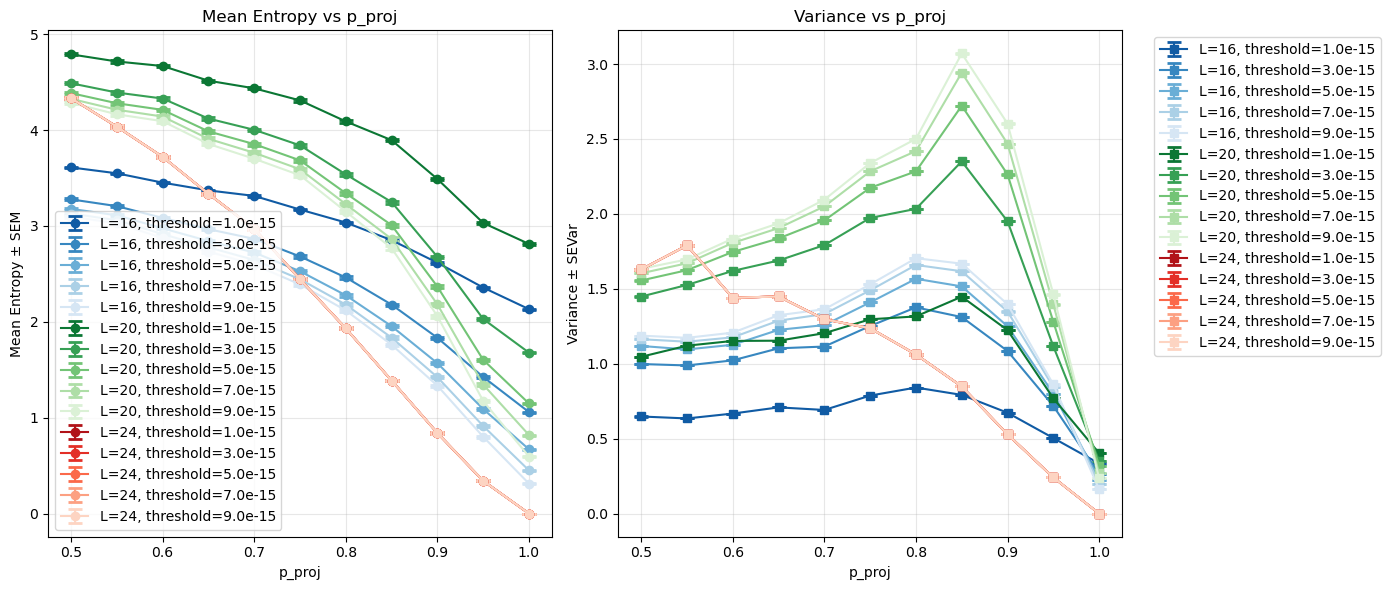

Threshold comparison for L=[16, 20, 24] saved to /scratch/ty296/plots/s0_threshold_comparison_L16_20_24.png


In [43]:
# Example usage
L_list = [16, 20, 24]  # Multiple L values
n = 0
p_fixed_name = 'p_ctrl'
p_fixed_value = 0.4

# Specify exactly which thresholds to compare
threshold_values = [1e-15, 3e-15, 5e-15, 7e-15, 9e-15]

fixed_L_threshold_comparison_plot("/scratch/ty296/plots", L_list, n, p_fixed_name, p_fixed_value, threshold_values)

In [10]:
# plot distributions
L_target = 20
threshold_val = 1e-14
min_sv_dict, maxbond_dict, entropy_dict = distribution_dict(combined_sv_filename, L_target, threshold_val)

INVALID MIN_SV (skipping): seed=0
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVALID MIN_SV (skipping): seed=1
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVALID MIN_SV (skipping): seed=10
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVALID MIN_SV (skipping): seed=100
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVALID MIN_SV (skipping): seed=101
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVALID MIN_SV (skipping): seed=102
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVALID MIN_SV (skipping): seed=103
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVALID MIN_SV (skipping): seed=104
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVALID MIN_SV (skipping): seed=105
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVALID MIN_SV (skipping): seed=106
  Parameters: L=20, p_ctrl=0.4, p_proj=0.55
  min_sv value: 0.0
INVAL

In [17]:
s0_dict = total_s0_dict(combined_sv_filename, threshold_val)

In [21]:
np.savetxt('s0_dict_20_0.4_0.65.txt', s0_dict[(20,0.4,0.65)])

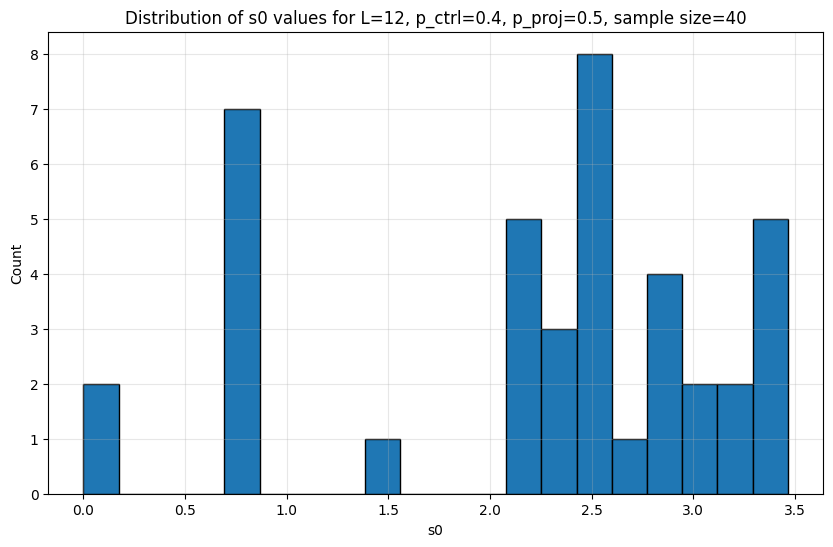

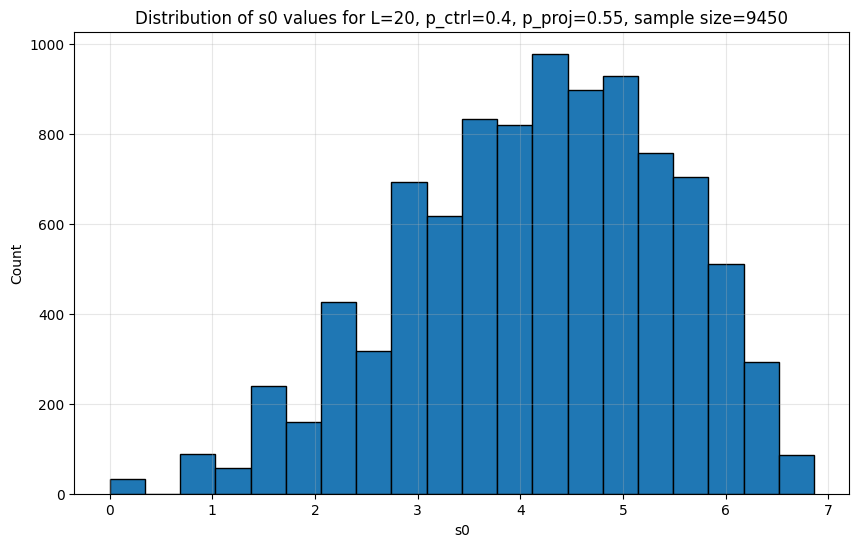

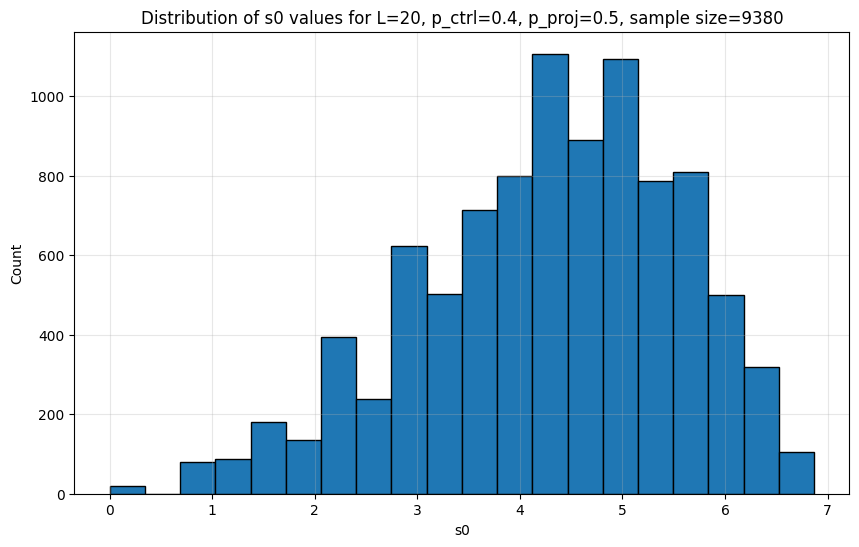

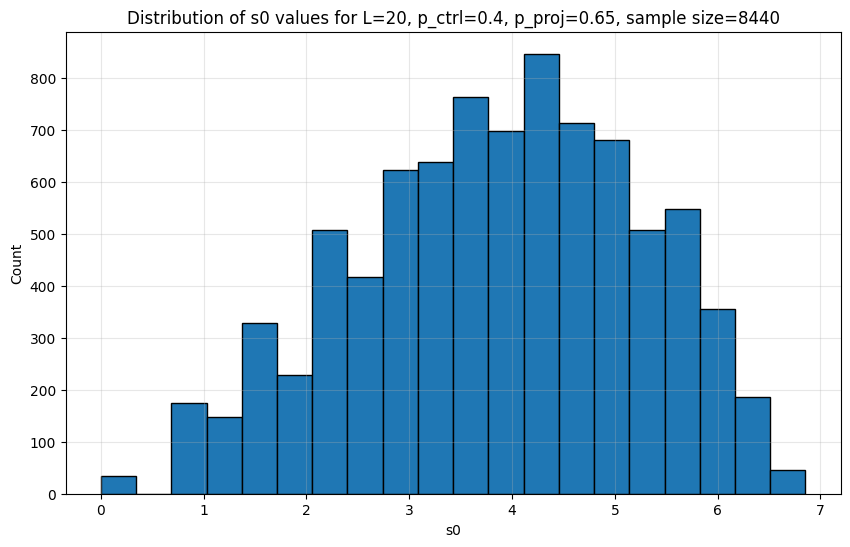

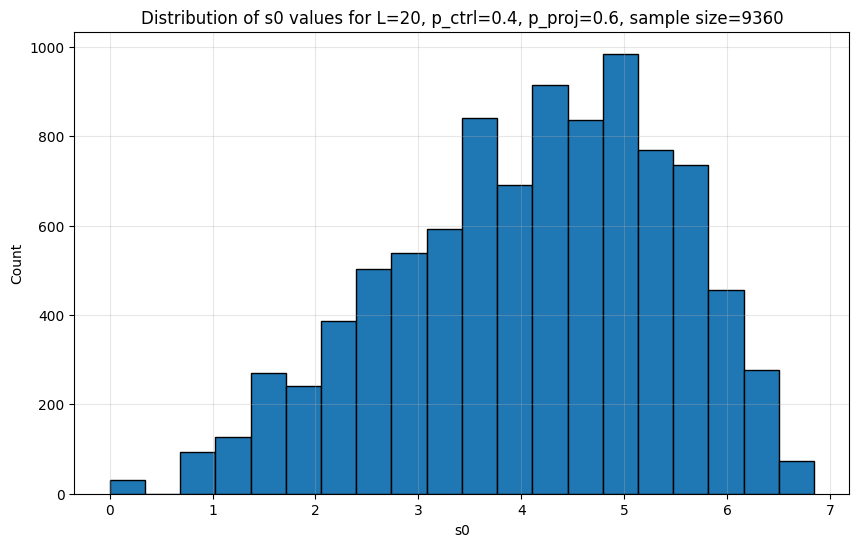

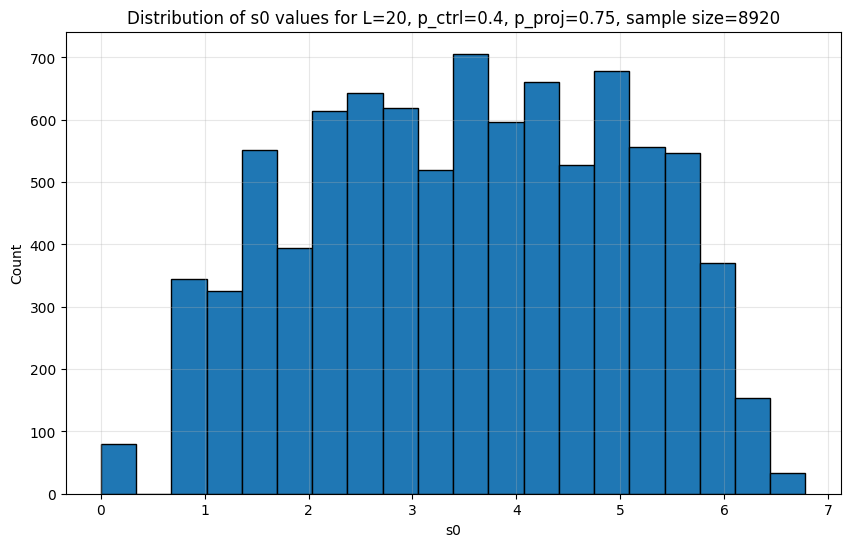

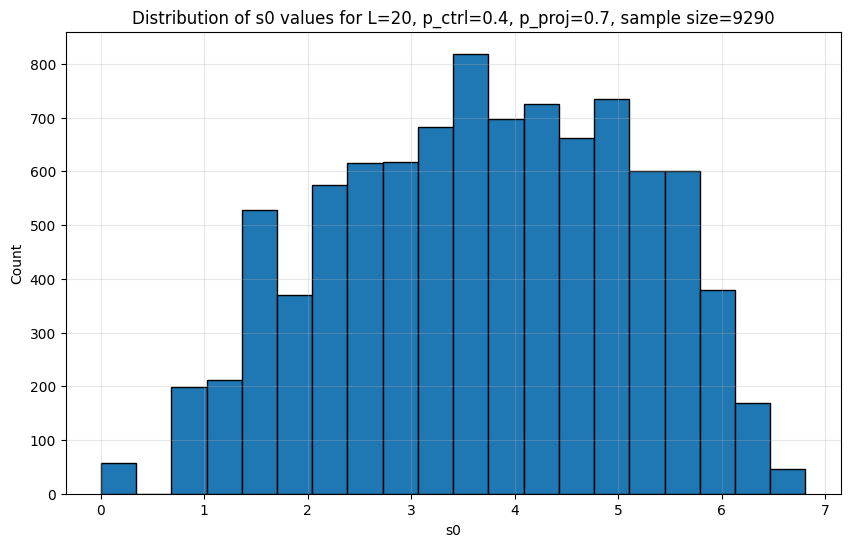

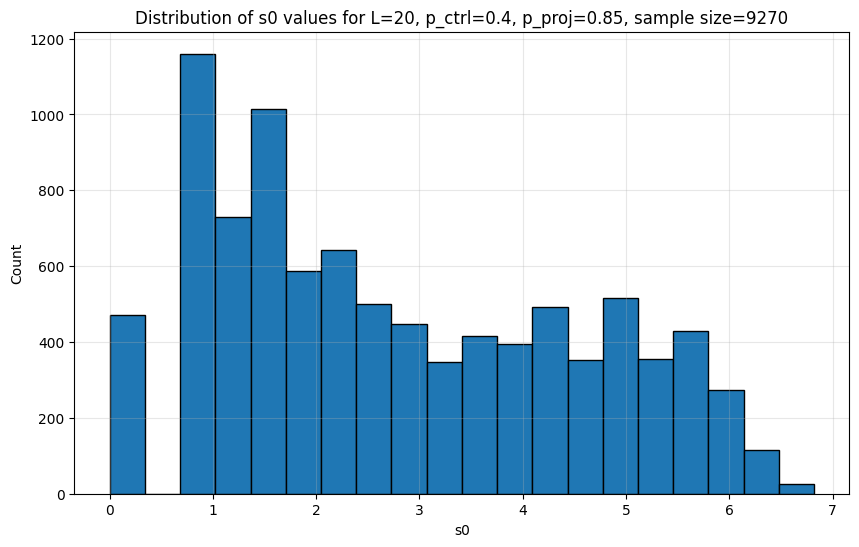

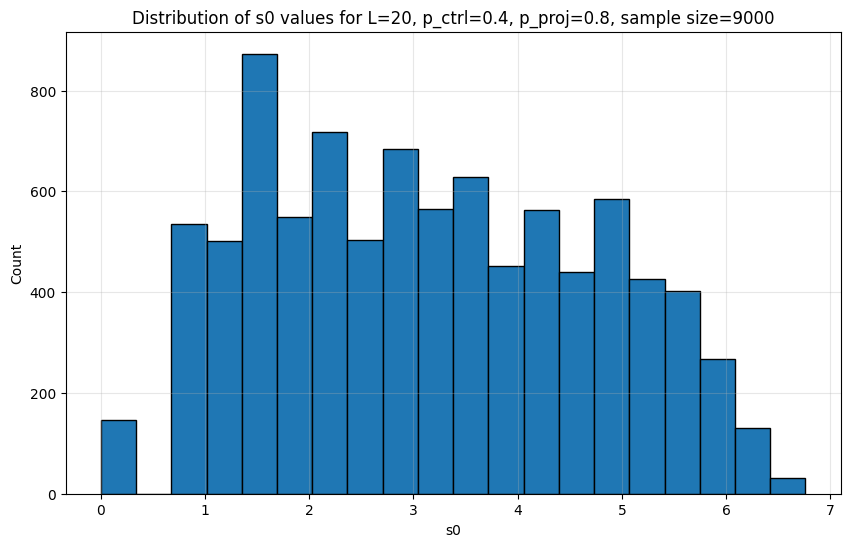

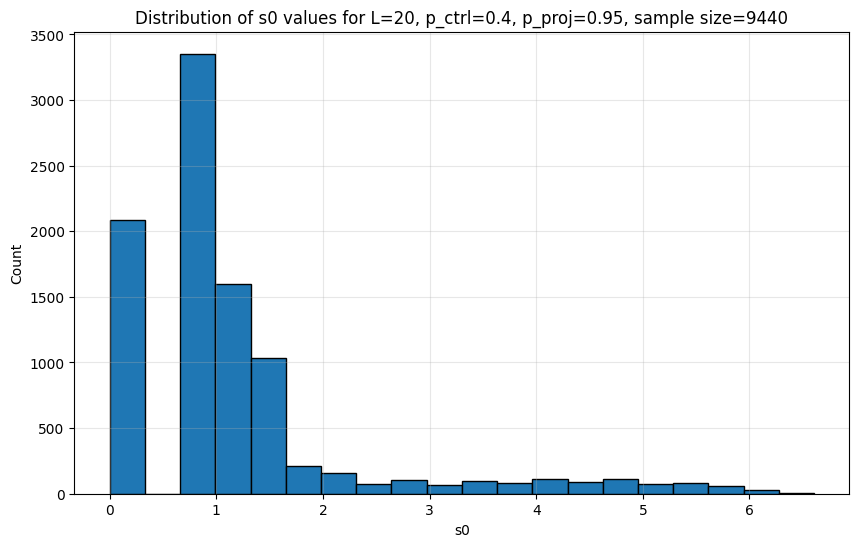

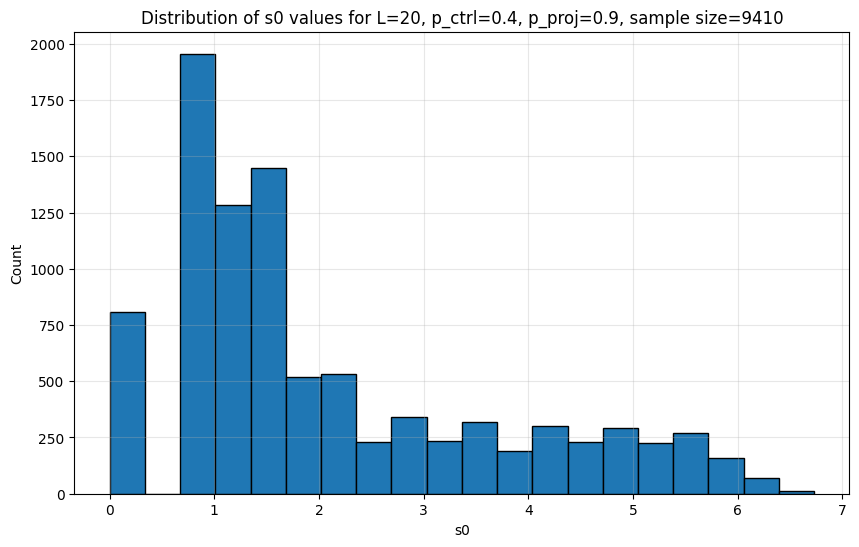

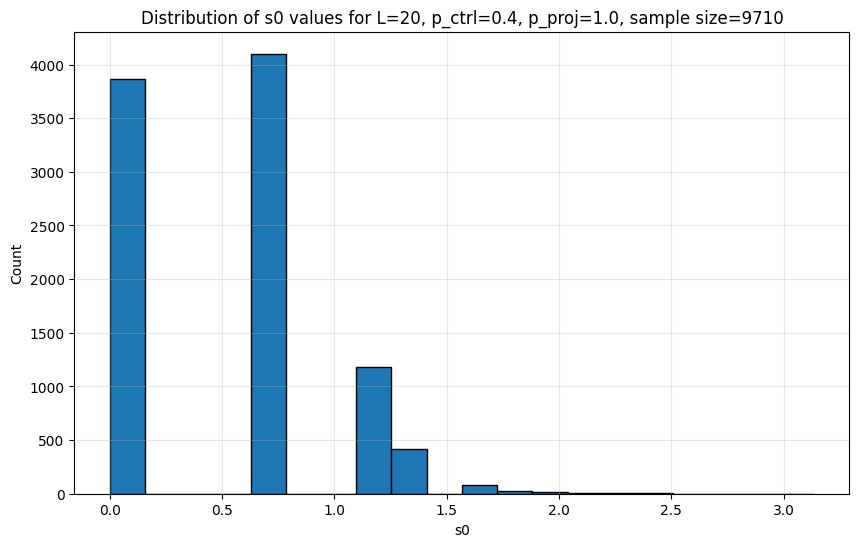

In [26]:
for key in s0_dict.keys():  
    plt.figure(figsize=(10,6))
    plt.hist(s0_dict[key], bins=20, edgecolor='black')
    plt.xlabel('s0')
    plt.ylabel('Count')
    plt.title(f'Distribution of s0 values for L={key[0]}, p_ctrl={key[1]}, p_proj={key[2]}, sample size={len(s0_dict[key])}')
    plt.grid(True, alpha=0.3)
plt.show()


In [12]:
len(min_sv_dict[(20,0.4,0.65)])

5

(20, 0.4, 0.5) 4
(20, 0.4, 0.55) 2
(20, 0.4, 0.6) 4
(20, 0.4, 0.65) 5
(20, 0.4, 0.7) 4
(20, 0.4, 0.75) 4
(20, 0.4, 0.8) 5
(20, 0.4, 0.85) 4


/scratch/ty296/CT_MPS_mini/read_hdf5_func.py:181: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(20, 0.4, 0.9) 2
(20, 0.4, 0.95) 8
(20, 0.4, 1.0) 10


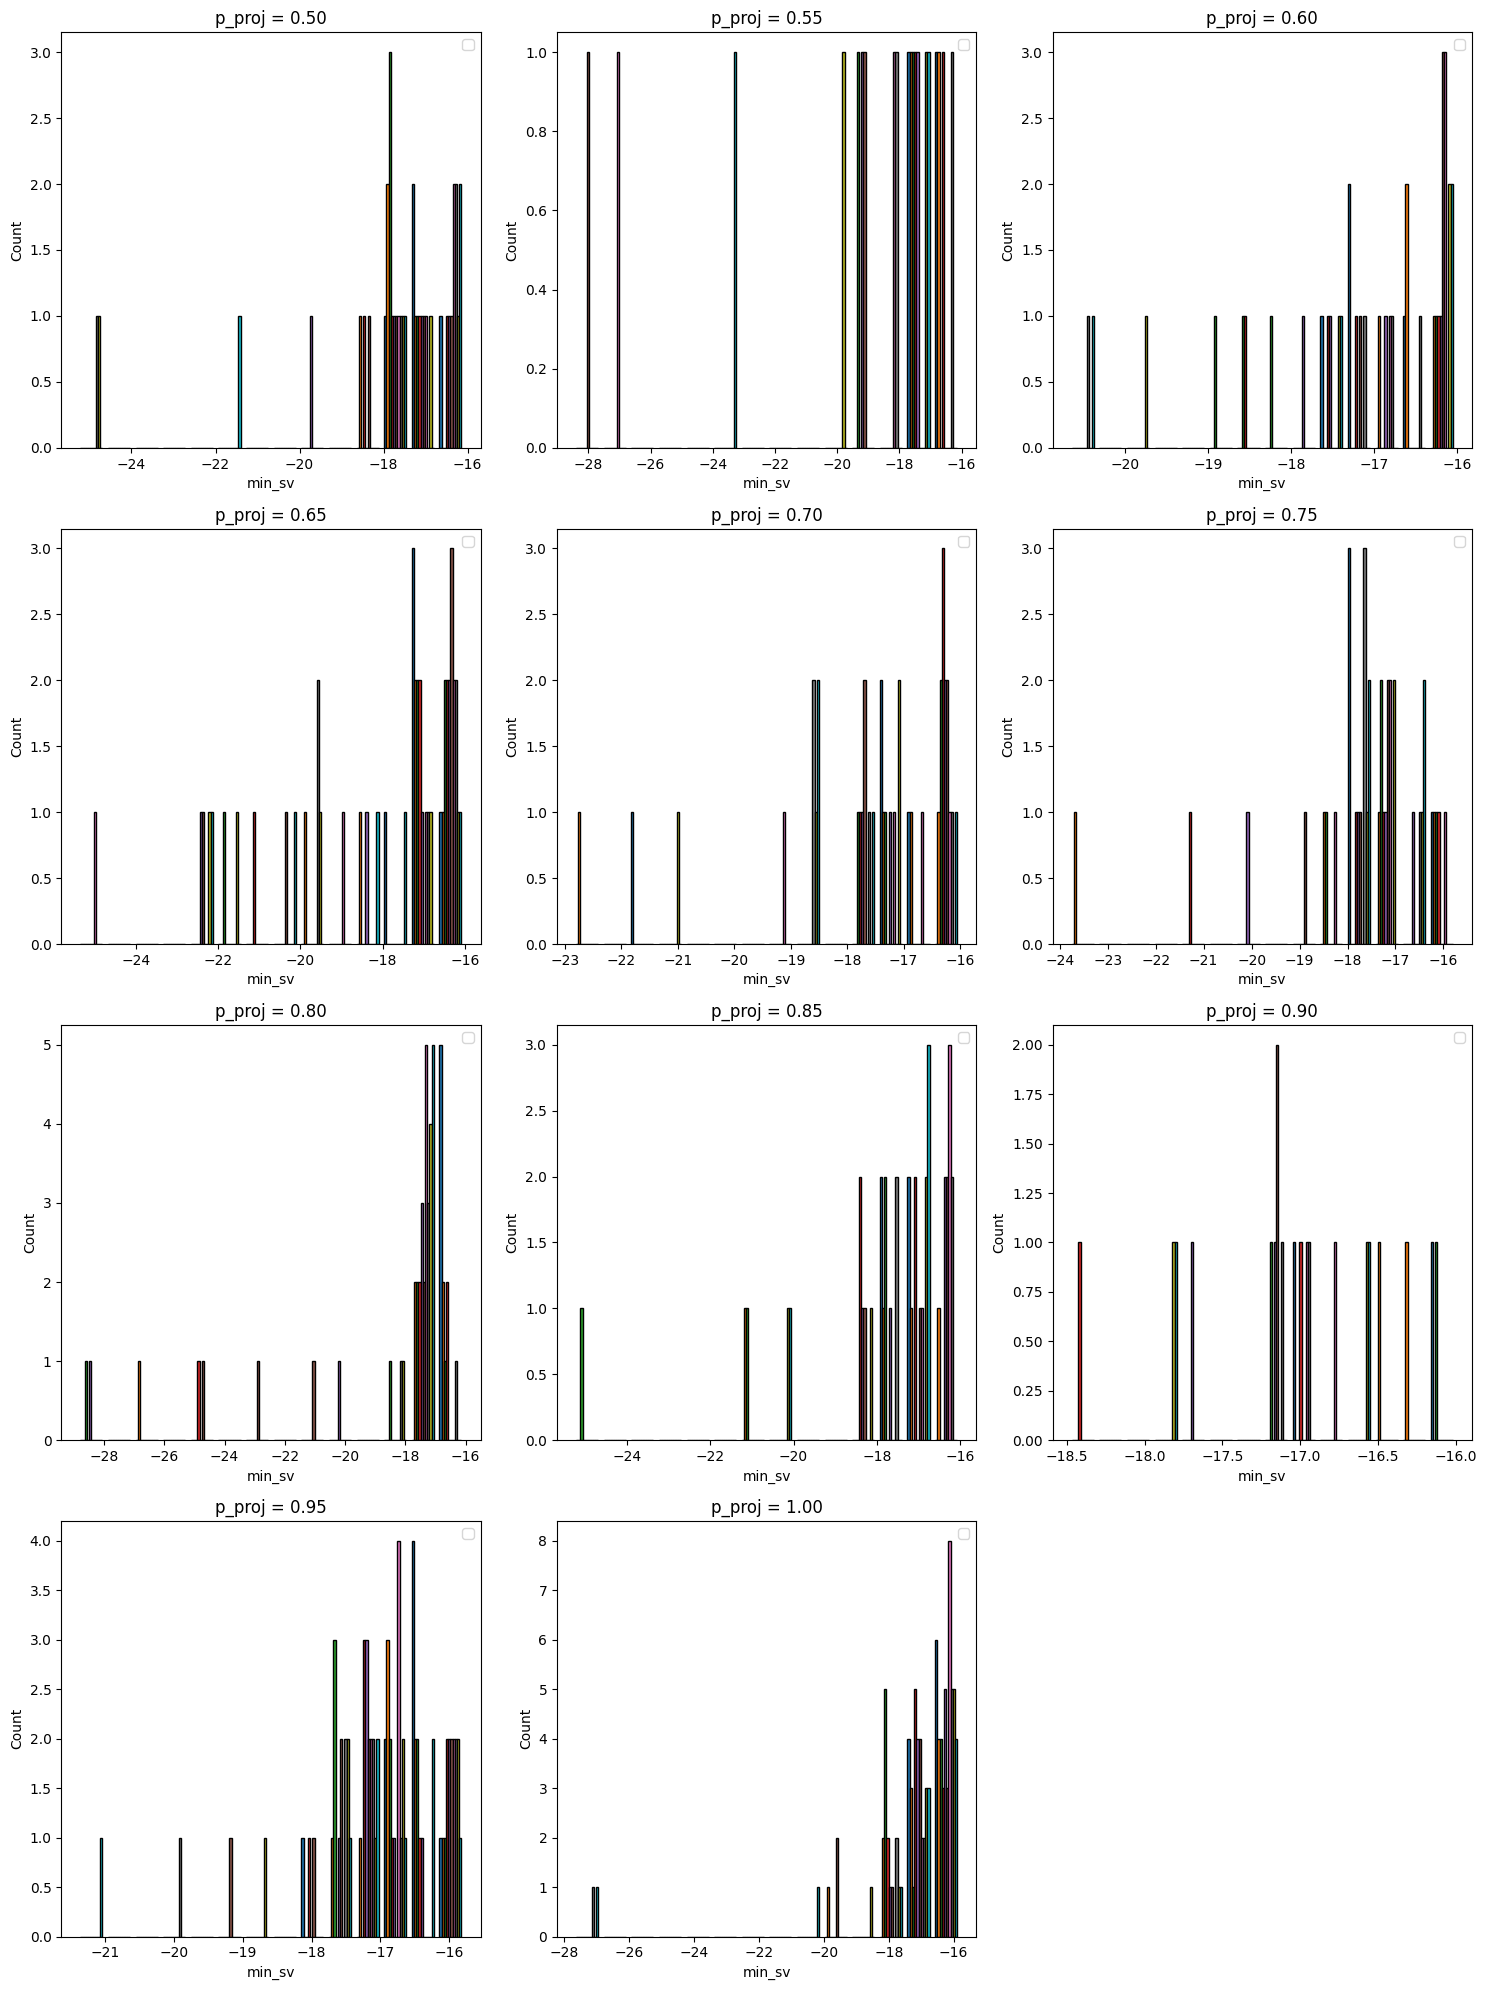

In [13]:
plot_distribution(min_sv_dict, x_label='min_sv', log_scale=True, n_bins=14)


(20, 0.4, 0.5) 938
(20, 0.4, 0.55) 945
(20, 0.4, 0.6) 936
(20, 0.4, 0.65) 844
(20, 0.4, 0.7) 929
(20, 0.4, 0.75) 892
(20, 0.4, 0.8) 900
(20, 0.4, 0.85) 927
(20, 0.4, 0.9) 941
(20, 0.4, 0.95) 944
(20, 0.4, 1.0) 971


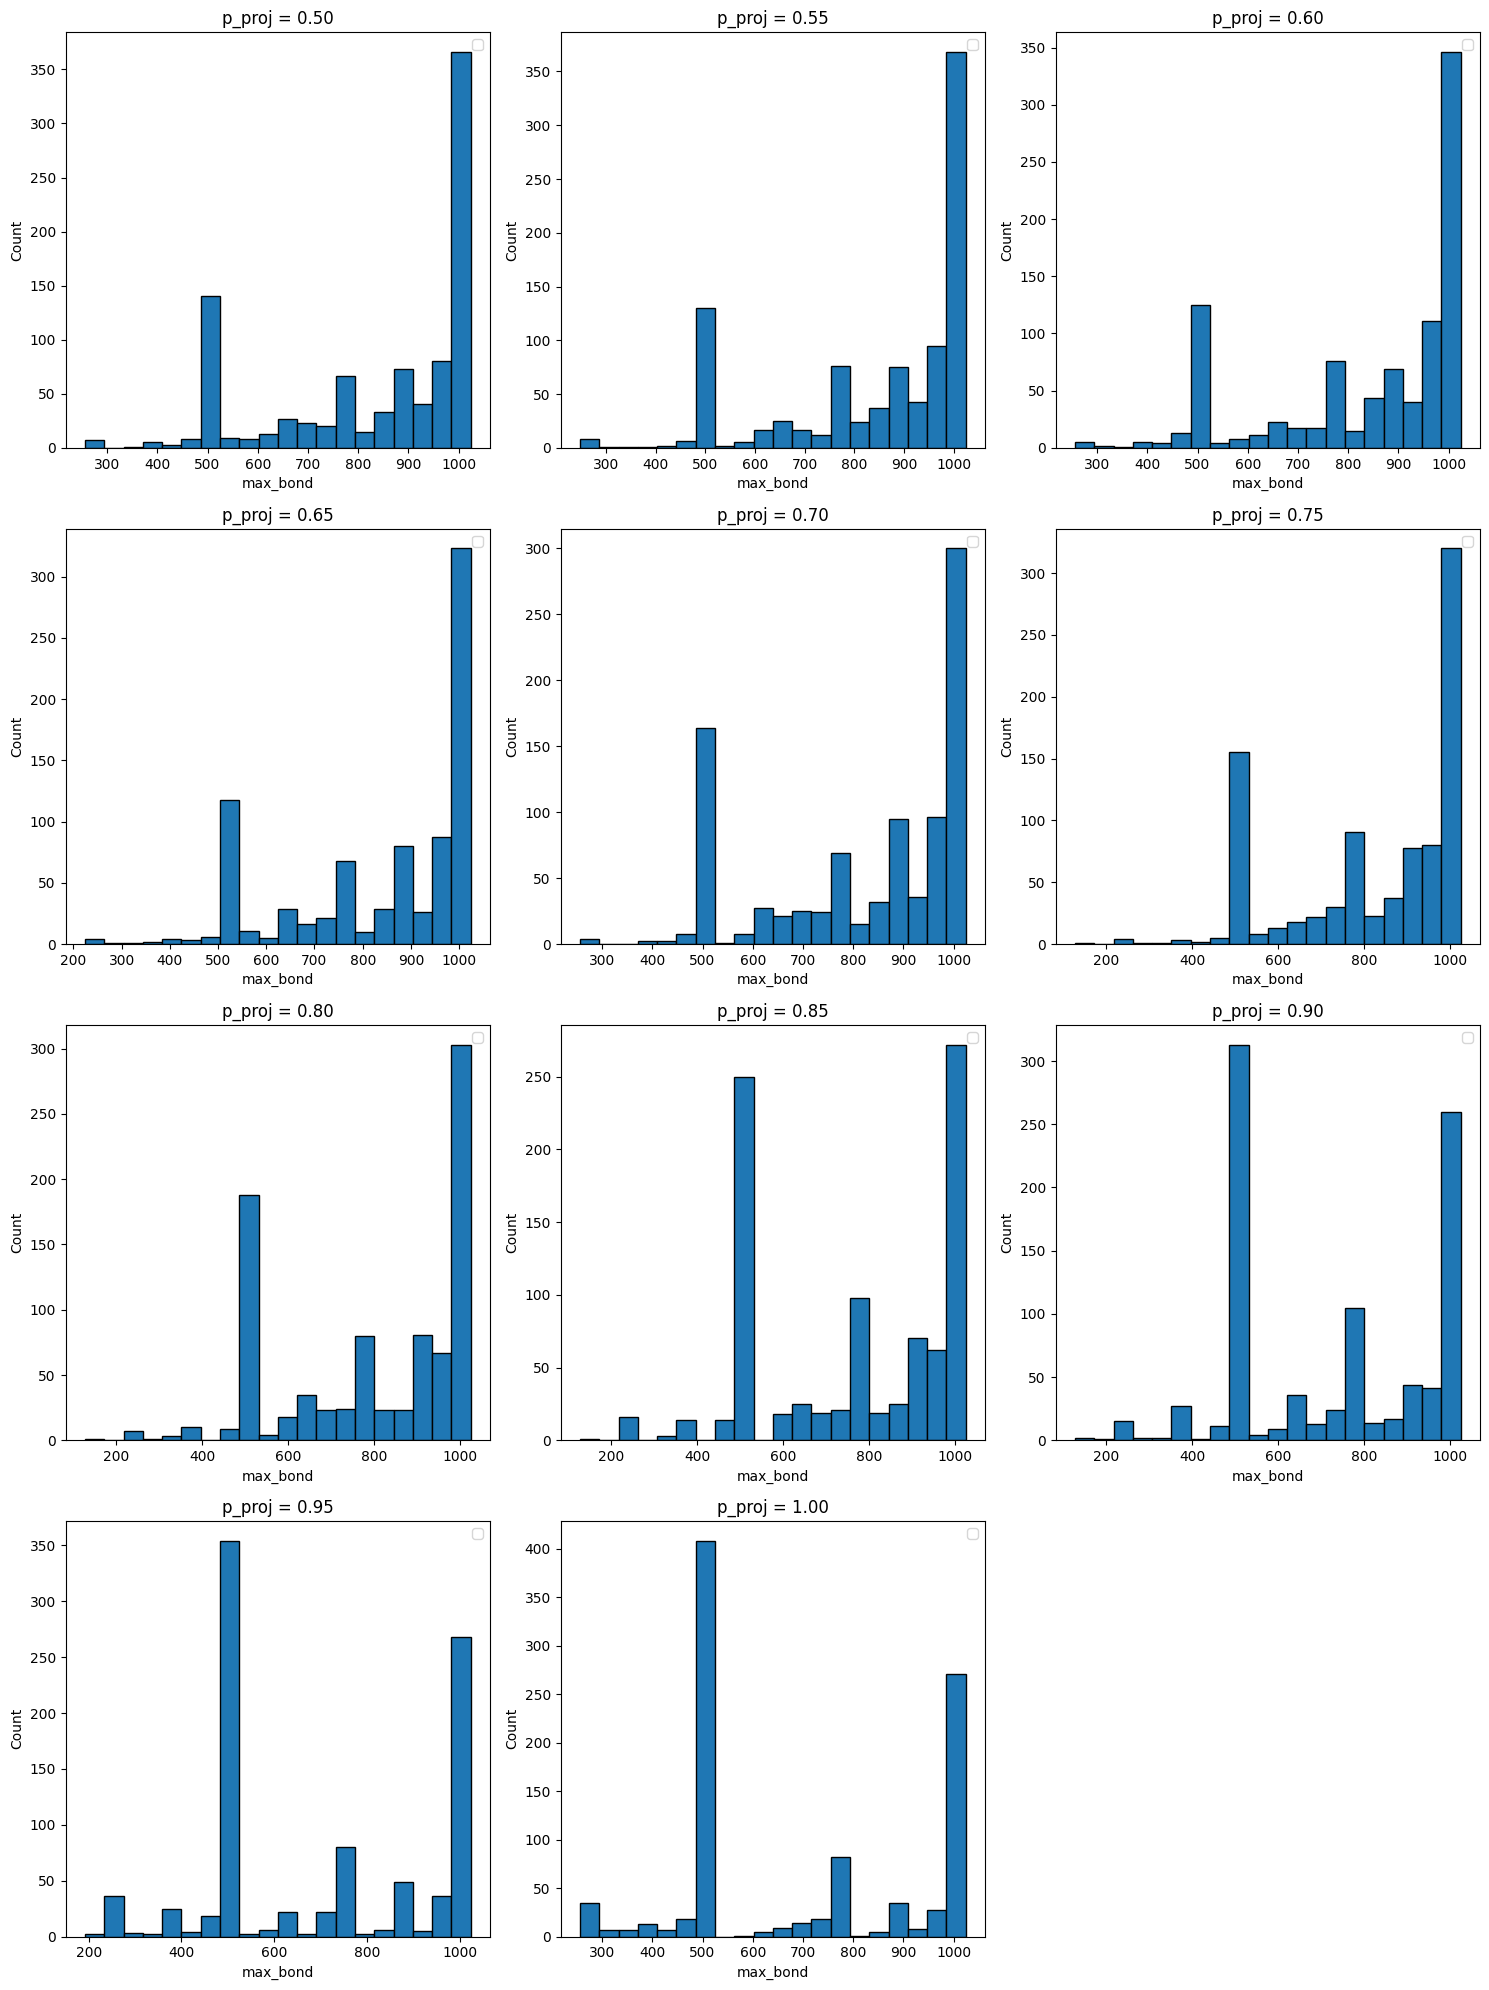

In [14]:
plot_distribution(maxbond_dict, x_label='max_bond')


In [15]:
len(entropy_dict)

11

(20, 0.4, 0.5) 4
(20, 0.4, 0.55) 2
(20, 0.4, 0.6) 4
(20, 0.4, 0.65) 5
(20, 0.4, 0.7) 4
(20, 0.4, 0.75) 4
(20, 0.4, 0.8) 5
(20, 0.4, 0.85) 4
(20, 0.4, 0.9) 2
(20, 0.4, 0.95) 8
(20, 0.4, 1.0) 10


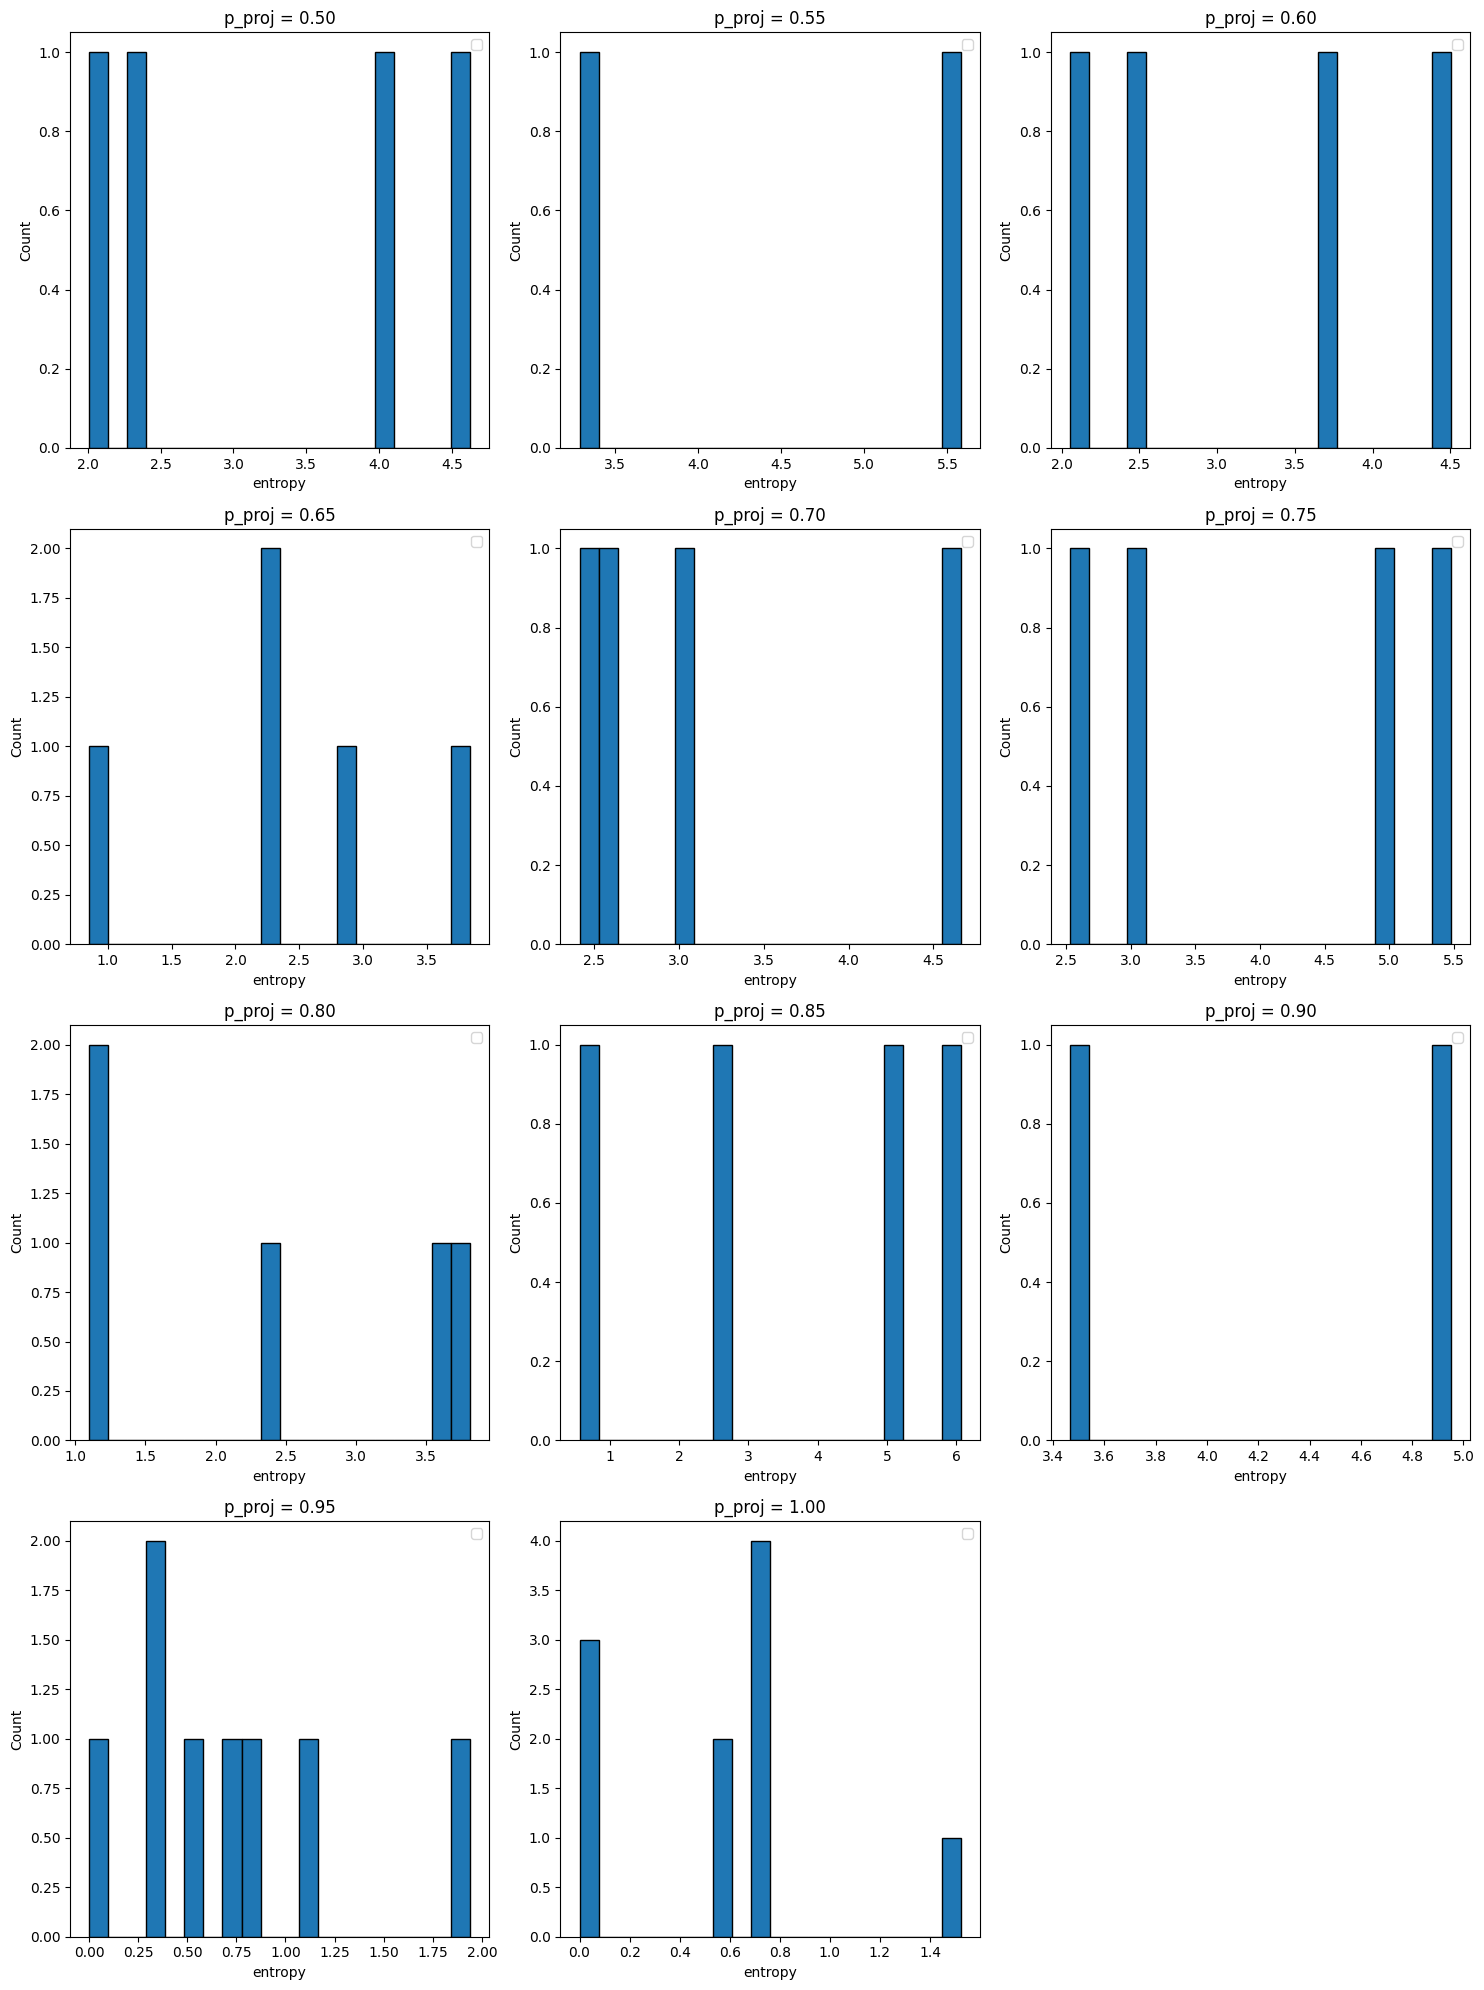

In [16]:
plot_distribution(entropy_dict, x_label='entropy')
